In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.layers import Dropout, BatchNormalization
from keras import backend as K
from keras.utils import to_categorical 
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.mixture import GaussianMixture

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
0#
df=pd.read_csv('C:/Users/Admin/Desktop/AI&DS/train_data.csv',sep=',')


In [5]:
df.shape

(227845, 31)

In [36]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [37]:
1# a)    Check all the latent features and parameters with their mean and standard deviation. 
df.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [38]:
# b) Find if there is any connection between Time, Amount, and the transaction being fraudulent.
print(df.groupby('Class').agg({'Time':'mean'}))
print(df.groupby('Class').agg({'Amount':'mean'}))

               Time
Class              
0      94778.158337
1      80144.459391
           Amount
Class            
0       88.455144
1      127.306523


In [39]:
print('We can see that the mean of both Time and Amount varies a lot according to the Class (transaction being fraudulent)')
print('More the time is small, the more it is likeli to be a fraud whereas more the amount is big, the more it is a fraud ')

We can see that the mean of both Time and Amount varies a lot according to the Class (transaction being fraudulent)
More the time is small, the more it is likeli to be a fraud whereas more the amount is big, the more it is a fraud 


In [43]:
#2 Check the class count for each class. It’s a class Imbalance problem.

print(pd.crosstab(df['Class'],df['Class']))
print('\n 0 is overrepresented')

Class       0    1
Class             
0      227451    0
1           0  394

 0 is overrepresented


In [44]:
#3 Let us balance the train set

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    170590
0    170590
Name: Class, dtype: int64

In [6]:
#4 ML classifiers 
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

logistic=LogisticRegression()
naive_gaussian = GaussianNB()
#svm=LinearSVC(random_state=0, tol=1e-5)
classif=[logistic,naive_gaussian]
cla=['logistic','naive_gaussian']

for i in range(2):
    upsampled = classif[i].fit(X_train, y_train)
    upsampled_pred = upsampled.predict(X_test)
    print('The F1 score of {} is {} '.format(cla[i],f1_score(y_test, upsampled_pred)))

    


The F1 score of logistic is 0.14057507987220447 
The F1 score of naive_gaussian is 0.20461095100864551 


In [48]:
print('the best classifier is naive bayes considering F1 score. The trained svm (linear or  not ) was very slow' )

the best classifier is naive bayes considering F1 score. The trained svm (linear or  not ) was very slow


In [45]:
y = df.Class
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

#random forest
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("random forest F1 score is", f1_score(y_test, rfc_pred))



random forest F1 score is 0.8287292817679558


In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth':15,'eta':1,'objective':'binary:logistic'}
num_round = 2
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
y_pred = (preds > 0.5)
print("xgboost F1 score is", f1_score(y_test, y_pred))

[00:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost F1 score is 0.8478260869565218


In [47]:
print("Taking in consideration f1 score, our best classifier is xgboost")

Taking in consideration f1 score, our best classifier is xgboost


In [9]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_scor(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Application of deep learning

In [48]:

sgd = SGD(lr=0.1)
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 23,401
Trainable params: 23,401
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
loss = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score= model.evaluate(X_test, y_test, verbose=0)
print("score=", score)




Epoch 1/5
668/668 [==============================] - 1s 2ms/step - loss: 60.0413 - accuracy: 0.9910 - val_loss: 0.0861 - val_accuracy: 0.9975
Epoch 2/5
668/668 [==============================] - 1s 2ms/step - loss: 19.0237 - accuracy: 0.9954 - val_loss: 24.7760 - val_accuracy: 0.9982
Epoch 3/5
668/668 [==============================] - 1s 2ms/step - loss: 13.0546 - accuracy: 0.9939 - val_loss: 26.9184 - val_accuracy: 0.9982
Epoch 4/5
668/668 [==============================] - 1s 2ms/step - loss: 26.0117 - accuracy: 0.9938 - val_loss: 100.5988 - val_accuracy: 0.9982
Epoch 5/5
668/668 [==============================] - 1s 2ms/step - loss: 80.8553 - accuracy: 0.9953 - val_loss: 89.3500 - val_accuracy: 0.9982
score= [81.98062133789062, 0.9982268810272217]


In [50]:
#another activation function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [51]:
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 202       
Total params: 23,502
Trainable params: 23,502
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
loss = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("score=", score)

Epoch 1/5
668/668 [==============================] - 1s 2ms/step - loss: 25.5533 - accuracy: 0.9937 - f1_scor: 0.9937 - val_loss: 1.2009 - val_accuracy: 0.9981 - val_f1_scor: 0.9981
Epoch 2/5
668/668 [==============================] - 1s 2ms/step - loss: 50.1830 - accuracy: 0.9939 - f1_scor: 0.9939 - val_loss: 31.1428 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 3/5
668/668 [==============================] - 1s 2ms/step - loss: 99.5837 - accuracy: 0.9937 - f1_scor: 0.9937 - val_loss: 133.9549 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 4/5
668/668 [==============================] - 1s 2ms/step - loss: 83.9256 - accuracy: 0.9954 - f1_scor: 0.9954 - val_loss: 118.6250 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 5/5
668/668 [==============================] - 1s 2ms/step - loss: 89.7946 - accuracy: 0.9953 - f1_scor: 0.9953 - val_loss: 50.3368 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
score= [46.01388168334961, 0.9982093572616577, 0.9982102513313293]


In [14]:
pred = model.predict(X_test)
print(f1_scor(y_test, pred))


tf.Tensor(0.9982093, shape=(), dtype=float32)


In [ ]:
print('ANN outperformed all the ML algorithms used before')

In [53]:
#2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from

model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 202       
Total params: 23,502
Trainable params: 23,502
Non-trainable params: 0
__________________________________________________

In [54]:
loss = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("score=", score)

Epoch 1/5
668/668 [==============================] - 2s 3ms/step - loss: 38.3343 - accuracy: 0.9943 - f1_scor: 0.9943 - val_loss: 5.7902 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 2/5
668/668 [==============================] - 2s 3ms/step - loss: 3.5446 - accuracy: 0.9969 - f1_scor: 0.9969 - val_loss: 0.3623 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 3/5
668/668 [==============================] - 2s 3ms/step - loss: 0.9666 - accuracy: 0.9968 - f1_scor: 0.9968 - val_loss: 0.0411 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 4/5
668/668 [==============================] - 2s 3ms/step - loss: 0.2493 - accuracy: 0.9977 - f1_scor: 0.9977 - val_loss: 0.0337 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
Epoch 5/5
668/668 [==============================] - 2s 3ms/step - loss: 0.1936 - accuracy: 0.9977 - f1_scor: 0.9977 - val_loss: 0.0286 - val_accuracy: 0.9982 - val_f1_scor: 0.9982
score= [0.021275145933032036, 0.9982268810272217, 0.9982278347015381]


In [17]:
print("with dropout layer, we have reduced significantly the training error")

with dropout layer, we have reduced significantly the training error


In [ ]:
#4. Anomaly Detection: let assume that data come from a combination of two gaussians distributions

In [70]:
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0 )
y = df.Class
X = df.drop('Class', axis=1)
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [71]:
#b
score=gm.predict_proba(X_train)
score


array([[1.00380848e-019, 1.00000000e+000],
       [1.00000000e+000, 2.51027158e-223],
       [2.02837752e-015, 1.00000000e+000],
       ...,
       [1.00000000e+000, 1.20436296e-051],
       [7.49027556e-016, 1.00000000e+000],
       [1.00000000e+000, 3.10877838e-078]])

In [72]:
score1=[score[i][0] for i in range(X_train.shape[0])]
score2=[score[i][1] for i in range(X_train.shape[0])]

In [73]:
df2=X_train
df2['class']=y_train
df2['score1']=score1
df2['score2']=score2
not_fraud = df2[df2['class']==0]
fraud = df2[df2['class']==1]

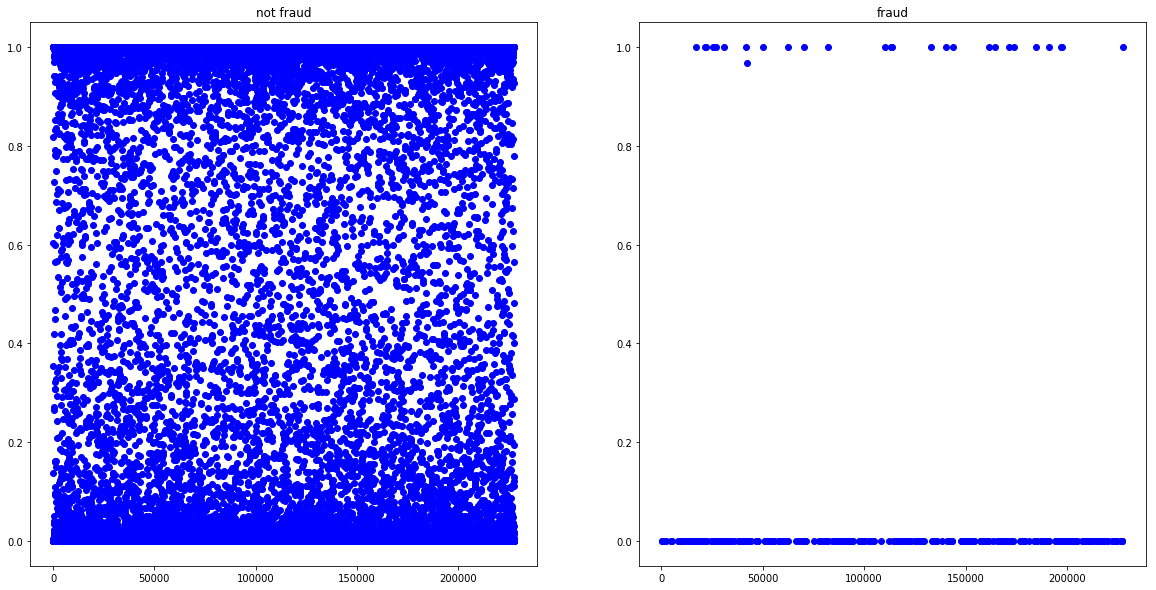

In [61]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=25)
plt.subplot(1,2,1)
plt.title('probability for observation to be drawing from the first gaussian')
plt.plot(not_fraud.score1,'bo')
plt.title('not fraud')
plt.subplot(1,2,2)
plt.plot(fraud.score1,'bo')
plt.title('fraud')
plt.show()

In [74]:
threshold1 = np.percentile(score1, 1)
threshold1

9.234769091684067e-21

In [76]:
#
score=score1<threshold1
X_train['score']=score
print('We can add the score variable as a feature in order to see whether the capability of our models get improved')

We can add the score variable as a feature in order to see whether the capability of our models get improved


In [84]:
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_scor])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 202       
Total params: 23,502
Trainable params: 23,502
Non-trainable params: 0
_________________________________________________

In [90]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
loss = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.5, callbacks=[], verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("score=", score)

score= [0.02435659032036, 0.99234560272217, 0.99822783123456]


In [91]:
print('the F1 score does not improve any better')

the F1 score does not improve any better
